<a href="https://colab.research.google.com/github/Tarunsaip/Deep_Learning_NN/blob/master/ImageClassification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
if not os.path.isdir('models'):
  os.mkdir('models')

print('Tensorflow version :', tf.__version__)
#print('Is using GPU?' tf.test.is_gpu_available())
#Use if you have Tensorflow locally

Tensorflow version : 2.2.0-rc3


In [0]:
def get_three_classes(x, y):
  indices_0, _ = np.where(y == 0.)
  indices_1, _ = np.where(y == 1.)
  indices_2, _ = np.where(y == 2.)

  indices = np.concatenate([indices_0, indices_1, indices_2], axis = 0)

  x = x[indices]
  y = y[indices]

  count = x.shape[0]
  indices = np.random.choice(range(count), count, replace = False)
  # False makes values not to repeat and random

  #Below code is to shuffle the values
  x = x[indices]
  y = y[indices]

  y = tf.keras.utils.to_categorical(y) #Converting into vectors

  return x, y

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


In [0]:
class_names = ['aeroplane', 'car', 'bird']

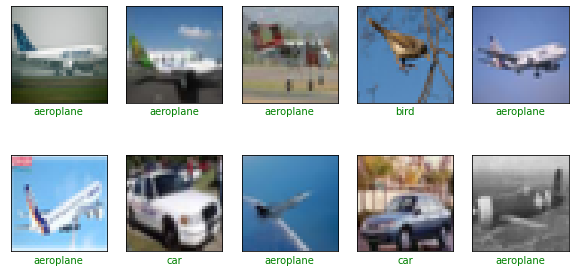

In [0]:
def show_random_examples(x, y, p) :
  indices = np.random.choice(range(x.shape[0]), 10, replace = False)

  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize = (10,5))

  for i in range(10) :
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color = col)
  plt.show

show_random_examples(x_train, y_train, y_train)

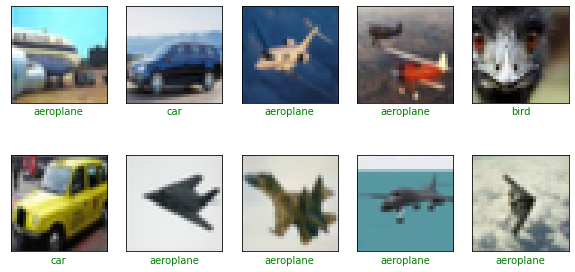

In [0]:
show_random_examples(x_test, y_test, y_test)

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model() :
  def add_conv_block(model, num_filters) :
    model.add(Conv2D(num_filters, 3, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters, 3, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Dropout(0.5))
    return model

  model = tf.keras.models.Sequential()
  model.add(Input(shape = (32, 32, 3)))

  model = add_conv_block(model, 32)
  model = add_conv_block(model, 64)
  model = add_conv_block(model, 128)
  
  model.add(Flatten())
  model.add(Dense(3, activation='softmax'))

  model.compile(
      loss = 'categorical_crossentropy',
      optimizer = 'adam', metrics = ['accuracy']
  )
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

In [0]:
h = model.fit(
    x_train/255., y_train,
    validation_data = (x_test/255.,y_test),
    epochs = 10, batch_size = 128,
    callbacks = [
                 tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3)
                 #Below code is to get a saved model locally
                 #tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5'
                 #save_best_only = True, save_weights_only = False,
                 #monitor = 'val_accuracy'
                 #)
    ]
)

Epoch 1/10
118/118 [==============================] - 84s 713ms/step - loss: 0.8704 - accuracy: 0.6867 - val_loss: 2.4156 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 84s 712ms/step - loss: 0.5507 - accuracy: 0.7763 - val_loss: 2.5300 - val_accuracy: 0.4340
Epoch 3/10
118/118 [==============================] - 84s 712ms/step - loss: 0.4881 - accuracy: 0.8009 - val_loss: 2.1263 - val_accuracy: 0.5200
Epoch 4/10
118/118 [==============================] - 84s 714ms/step - loss: 0.4496 - accuracy: 0.8207 - val_loss: 1.4317 - val_accuracy: 0.5173
Epoch 5/10
118/118 [==============================] - 84s 709ms/step - loss: 0.4177 - accuracy: 0.8355 - val_loss: 0.8240 - val_accuracy: 0.6980
Epoch 6/10
118/118 [==============================] - 84s 713ms/step - loss: 0.3799 - accuracy: 0.8505 - val_loss: 0.5365 - val_accuracy: 0.8123
Epoch 7/10
118/118 [==============================] - 84s 710ms/step - loss: 0.3621 - accuracy: 0.8568 - val_loss: 0.4615 - val_ac

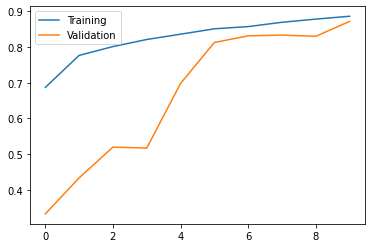

In [0]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label = 'Training')
plt.plot(range(len(accs)), val_accs, label = 'Validation')
plt.legend()
plt.show()

In [0]:
#load the best accurate model
#model = tf.keras.models.load_model('models/model_0.910.h5')

In [0]:
preds = model.predict(x_test/255.)

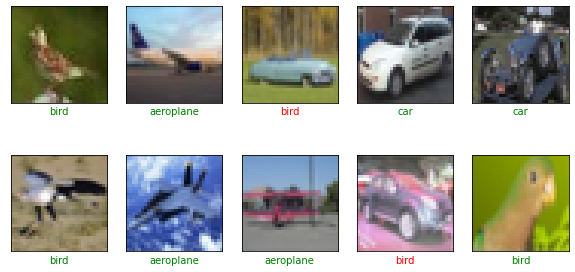

In [0]:
show_random_examples(x_test, y_test, preds)